In [2]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

n
2433


In [3]:
kaggle.house.lmSplitByCategAttrs = function (df, lm.formula, min.group.count) {
    
    formulaVars = as.list(attr(terms(lm.formula), "variables"))[-1]
    categColNames = names(which(sapply(df, is.character)))
    colNames = c(
                    categColNames, 
                    sapply(formulaVars, deparse)
                )
    
    df %>% 
        select(colNames) %>%
        gather_("attr", "attr_val", gather_cols=categColNames) %>%
        group_by_("attr", "attr_val") %>%
        do(glance(lm(lm.formula, data=.))) %>%
        mutate(n = df + df.residual) %>%
        filter(n >= min.group.count) %>%
        arrange(desc(r.squared))
}

x = kaggle.house.lmSplitByCategAttrs(
        df=df.lot_frontage, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(20) %>% select(-AIC, -BIC)

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
MSZoning,FV,0.8955410,0.8946482,0.1570255,1003.0563,3.153496e-59,2,52.465143,2.884869,117,119
Exterior2nd,CmentBd,0.8471182,0.8457888,0.2291791,637.2150,1.015011e-48,2,7.363244,6.040154,115,117
Neighborhood,Somerst,0.8250515,0.8239581,0.1900050,754.5549,1.875909e-62,2,40.172389,5.776303,160,162
Exterior1st,CemntBd,0.8028090,0.8010793,0.2582962,464.1197,5.344129e-42,2,-6.564952,7.605730,114,116
Exterior2nd,HdBoard,0.7873747,0.7866564,0.1970255,1096.1206,1.601188e-101,2,62.237534,11.490434,296,298
MSSubClass,160,0.7722380,0.7702401,0.1228811,386.5224,2.013711e-38,2,79.610289,1.721372,114,116
LotShape,Reg,0.7656413,0.7655054,0.1727158,5635.5120,0.000000e+00,2,583.292403,51.458011,1725,1727
LotShape2,Reg,0.7656413,0.7655054,0.1727158,5635.5120,0.000000e+00,2,583.292403,51.458011,1725,1727
Exterior1st,HdBoard,0.7590966,0.7583553,0.2075318,1024.0884,1.797117e-102,2,51.208018,13.997577,325,327
MSZoning,RM,0.7530493,0.7524669,0.2048580,1292.9421,7.631646e-131,2,71.931174,17.793927,424,426


### {MSZoning == 'FV'} and {Neighborhood == 'Somerst'} are heavily intersected 

In [44]:
df.lot_frontage %>% 
    filter(MSZoning == 'FV') %>%
    group_by(Neighborhood) %>%
    count()

df.lot_frontage %>% 
    filter(Neighborhood == 'Somerst') %>%
    group_by(MSZoning) %>%
    count()

Neighborhood,n
Somerst,119


MSZoning,n
FV,119
RL,43


# Neighborhood == 'Somerst'

In [47]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood == 'Somerst')

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=50)

x %>% head(10) %>% select(-AIC, -BIC)

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
LotShape,Reg,0.9809293,0.9807575,0.06516072,5709.4415,2.771905e-97,2,149.26043,0.4712970,111,113
LotShape2,Reg,0.9809293,0.9807575,0.06516072,5709.4415,2.771905e-97,2,149.26043,0.4712970,111,113
HouseStyle,2Story,0.9567311,0.9561542,0.10905989,1658.3475,6.743697e-53,2,62.37602,0.8920545,75,77
HouseStyle.2Story,Y,0.9567311,0.9561542,0.10905989,1658.3475,6.743697e-53,2,62.37602,0.8920545,75,77
OverallQual,7,0.9111894,0.9098231,0.13948300,666.8947,6.894196e-36,2,37.92379,1.2646080,65,67
SaleType,WD,0.9056995,0.9047172,0.15348406,922.0219,5.097981e-51,2,45.62191,2.2615061,96,98
BsmtFinType1,Unf,0.9038439,0.9024298,0.12894334,639.1833,2.670547e-36,2,45.07562,1.1305942,68,70
SaleCondition,Normal,0.9027980,0.9017640,0.15549533,873.0587,2.273349e-49,2,43.46187,2.2728069,94,96
GarageCarsChar,2,0.8979850,0.8970822,0.14928062,994.6799,7.707317e-58,2,56.55251,2.5181716,113,115
Condition1,Norm,0.8979689,0.8972295,0.15009282,1214.5287,2.862724e-70,2,67.86601,3.1088441,138,140


LotShape2,n
Ireg,49
Reg,113


LotShape2,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
Ireg,0.4339346,0.4218907,0.30995755,36.02928,2.668880e-07,2,-11.11233,28.22466,33.90012,4.515463,47
Reg,0.9809293,0.9807575,0.06516072,5709.44146,2.771905e-97,2,149.26043,-292.52086,-284.33870,0.471297,111


LotShape2,term,estimate,std.error,statistic,p.value
Ireg,(Intercept),-0.7273705,0.81326468,-0.8943835,3.756741e-01
Ireg,LotArea.Log,0.5424687,0.09037471,6.0024397,2.668880e-07
Reg,(Intercept),-3.2500195,0.09679394,-33.5766836,5.755464e-60
Reg,LotArea.Log,0.8295389,0.01097842,75.5608461,2.771905e-97


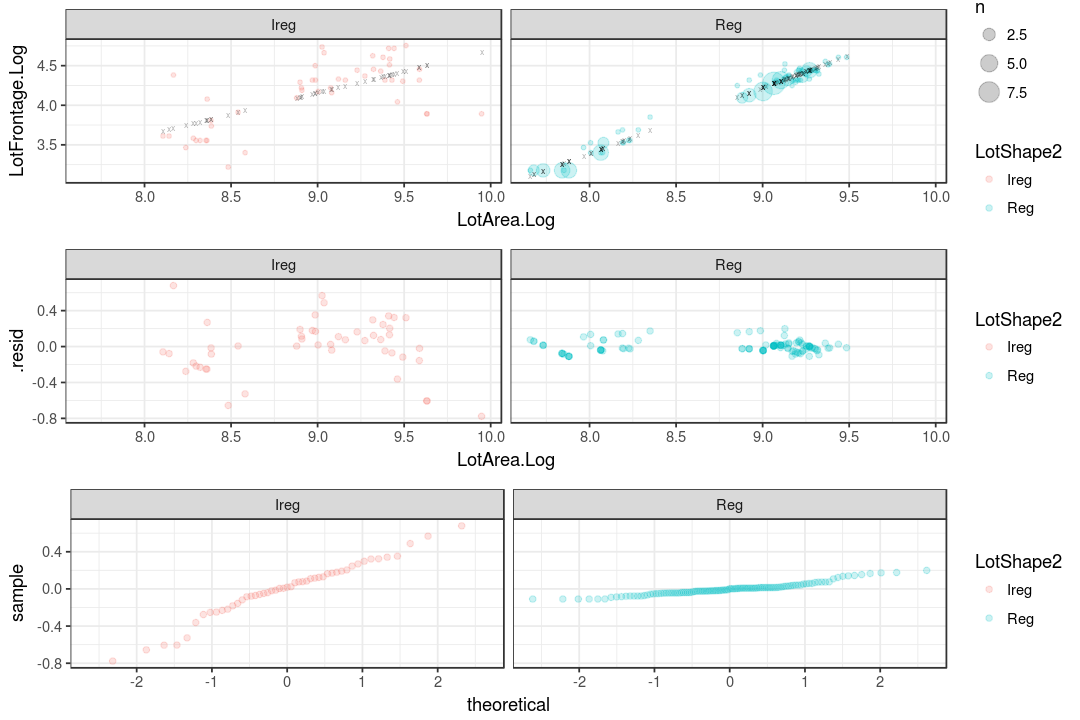

In [16]:
options(repr.plot.width = 9, repr.plot.height = 6)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood == 'Somerst') %>%
    group_by(LotShape2)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% group_by(LotShape2) %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = LotShape2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~LotShape2) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=LotShape2), alpha=0.2) +
    facet_wrap(~LotShape2) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid, colour=LotShape2)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    facet_wrap(~LotShape2) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [45]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst')

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(15) %>% select(-AIC, -BIC)

df.lot_frontage %>% 
    filter(MSZoning == 'RM') %>%
    group_by(LotShape2) %>%
    count()

df.lot_frontage %>% 
    filter(LotShape2 == 'Reg') %>%
    group_by(MSZoning) %>%
    count()

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
Exterior2nd,HdBoard,0.7873747,0.7866564,0.1970255,1096.1206,1.601188e-101,2,62.23753,11.490434,296,298
Exterior1st,HdBoard,0.7590966,0.7583553,0.2075318,1024.0884,1.797117e-102,2,51.20802,13.997577,325,327
MSZoning,RM,0.7530493,0.7524669,0.2048580,1292.9421,7.631646e-131,2,71.93117,17.793927,424,426
LotShape,Reg,0.7450488,0.7448906,0.1750336,4710.7783,0.000000e+00,2,523.67664,49.386446,1612,1614
LotShape2,Reg,0.7450488,0.7448906,0.1750336,4710.7783,0.000000e+00,2,523.67664,49.386446,1612,1614
OverallQual,4,0.7393726,0.7380429,0.2086670,556.0315,3.890628e-59,2,30.32436,8.534214,196,198
Neighborhood,NridgHt,0.7353457,0.7337019,0.1935426,447.3407,2.450826e-48,2,37.40719,6.030857,161,163
HouseStyle,2Story,0.7220278,0.7215887,0.2355374,1644.2065,3.962206e-178,2,18.11289,35.117495,633,635
HouseStyle.2Story,Y,0.7220278,0.7215887,0.2355374,1644.2065,3.962206e-178,2,18.11289,35.117495,633,635
MasVnrType,Stone,0.7178894,0.7163888,0.2108582,478.4053,1.495489e-53,2,27.15519,8.358700,188,190


LotShape2,n
Ireg,33
Reg,393


MSZoning,n
C (all),22
FV,85
RH,17
RL,1207
RM,393
NA,3


# Neighborhood != 'Somerst' & LotShape2 == 'Reg'

In [25]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg')

df %>% 
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.)))

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(20) %>% select(-AIC, -BIC)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.7450488,0.7448906,0.1750336,4710.778,0,2,523.6766,-1041.353,-1025.194,49.38645,1612


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
Exterior2nd,HdBoard,0.9034331,0.9029981,0.1380644,2076.9240,1.164306e-114,2,126.69004,4.231718,222,224
Exterior1st,HdBoard,0.8907824,0.8903197,0.1467115,1924.8248,1.813107e-115,2,120.08728,5.079724,236,238
Exterior1st,Plywood,0.8696139,0.8684702,0.1593683,760.3264,2.954574e-52,2,49.45019,2.895401,114,116
HouseStyle,2Story,0.8686114,0.8682838,0.1784351,2651.0162,7.967247e-179,2,123.75306,12.767468,401,403
MasVnrType,BrkFace,0.8672346,0.8669139,0.1512570,2704.2823,1.266274e-183,2,196.45430,9.471776,414,416
BsmtFinType1,GLQ,0.8494347,0.8489714,0.1453059,1833.5317,1.151242e-135,2,167.76500,6.861990,325,327
BsmtFinType1,ALQ,0.8362648,0.8356125,0.1639038,1281.9628,1.303156e-100,2,99.55681,6.742980,251,253
Foundation,CBlock,0.8293274,0.8291149,0.1684759,3901.9151,1.598532e-310,2,292.43075,22.792446,803,805
OverallQual,4,0.8203636,0.8193766,0.1735969,831.1579,9.197442e-70,2,62.10829,5.484734,182,184
BsmtQual,Gd,0.8193465,0.8189512,0.1606100,2072.7052,6.370564e-172,2,189.11780,11.788570,457,459


HouseStyle.2Story,n
N,1211
Y,403


HouseStyle.2Story,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
N,0.6145353,0.6142164,0.1705353,1927.474,1.562667e-252,2,424.6985,-843.3969,-828.0993,35.16050,1209
Y,0.8686114,0.8682838,0.1784351,2651.016,7.967247e-179,2,123.7531,-241.5061,-229.5093,12.76747,401


HouseStyle.2Story,term,estimate,std.error,statistic,p.value
N,(Intercept),-0.7545678,0.11265095,-6.698281,3.223374e-11
N,LotArea.Log,0.5462467,0.01244213,43.903003,1.562667e-252
Y,(Intercept),-1.8681138,0.11535872,-16.193954,9.657657e-46
Y,LotArea.Log,0.6697016,0.01300694,51.488020,7.967247e-179


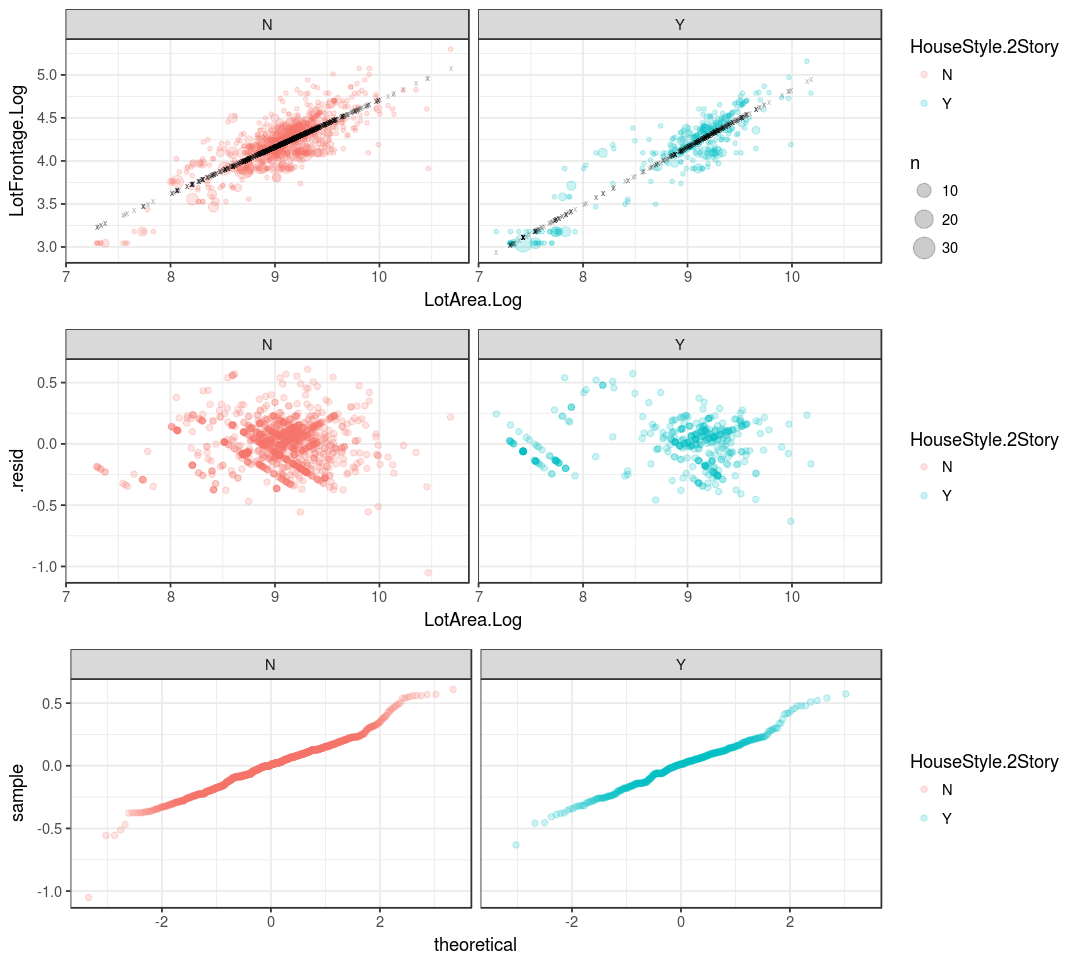

In [5]:
options(repr.plot.width = 9, repr.plot.height = 8)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg') %>%
    group_by(HouseStyle.2Story)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour=HouseStyle.2Story), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~HouseStyle.2Story) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=HouseStyle.2Story), alpha=0.2) +
    facet_wrap(~HouseStyle.2Story) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(aes(colour=HouseStyle.2Story), distribution=qnorm, alpha=0.2) +
    facet_wrap(~HouseStyle.2Story) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [43]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg') %>%
        filter(HouseStyle.2Story == 'N')

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(15) %>% select(-AIC, -BIC)

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
BsmtFinType1,GLQ,0.8323023,0.8316150,0.1524278,1210.9991,1.379150e-96,2,114.68705,5.669151,244,246
BsmtExposure,Av,0.8116121,0.8104122,0.1666399,676.3868,8.702741e-59,2,60.31041,4.359711,157,159
OverallQual,7,0.7898179,0.7882948,0.1457743,518.5734,1.382739e-48,2,71.95321,2.932521,138,140
BsmtQual,Gd,0.7712380,0.7704677,0.1707661,1001.2923,3.887668e-97,2,105.21141,8.660836,297,299
ExterQual,Gd,0.7468267,0.7455671,0.1464467,592.9226,7.177444e-62,2,102.94251,4.310772,201,203
GarageFinish,Fin,0.7455678,0.7441384,0.1673859,521.5970,8.609349e-55,2,67.33823,4.987213,178,180
GarageType,Attchd,0.7336161,0.7331744,0.1474504,1660.6507,2.340109e-175,2,300.67335,13.110192,603,605
GarageType2,Attchd,0.7336161,0.7331744,0.1474504,1660.6507,2.340109e-175,2,300.67335,13.110192,603,605
OverallQual,4,0.7200694,0.7182032,0.1732400,385.8471,2.583211e-43,2,51.79573,4.501815,150,152
GarageFinish,RFn,0.7128613,0.7117569,0.1524359,645.4857,2.083524e-72,2,122.06679,6.041546,260,262


GarageType2,n
Another,154
Attchd,605
Detchd,452


GarageType2,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
Another,0.6177439,0.6152290,0.2239285,245.6392,1.486310e-33,2,12.94002,-19.88004,-10.76918,7.621882,152
Attchd,0.7336161,0.7331744,0.1474504,1660.6507,2.340109e-175,2,300.67335,-595.34669,-582.13101,13.110192,603
Detchd,0.2766771,0.2750697,0.1493422,172.1288,1.589916e-33,2,219.12671,-432.25342,-419.91237,10.036394,450


GarageType2,term,estimate,std.error,statistic,p.value
Another,(Intercept),-0.5991792,0.30026712,-1.995487,4.777667e-02
Another,LotArea.Log,0.5246281,0.03347362,15.672880,1.486310e-33
Attchd,(Intercept),-1.1474090,0.13304256,-8.624376,5.693642e-17
Attchd,LotArea.Log,0.5943219,0.01458420,40.751083,2.340109e-175
Detchd,(Intercept),1.1403487,0.22618328,5.041702,6.700296e-07
Detchd,LotArea.Log,0.3300755,0.02515860,13.119787,1.589916e-33


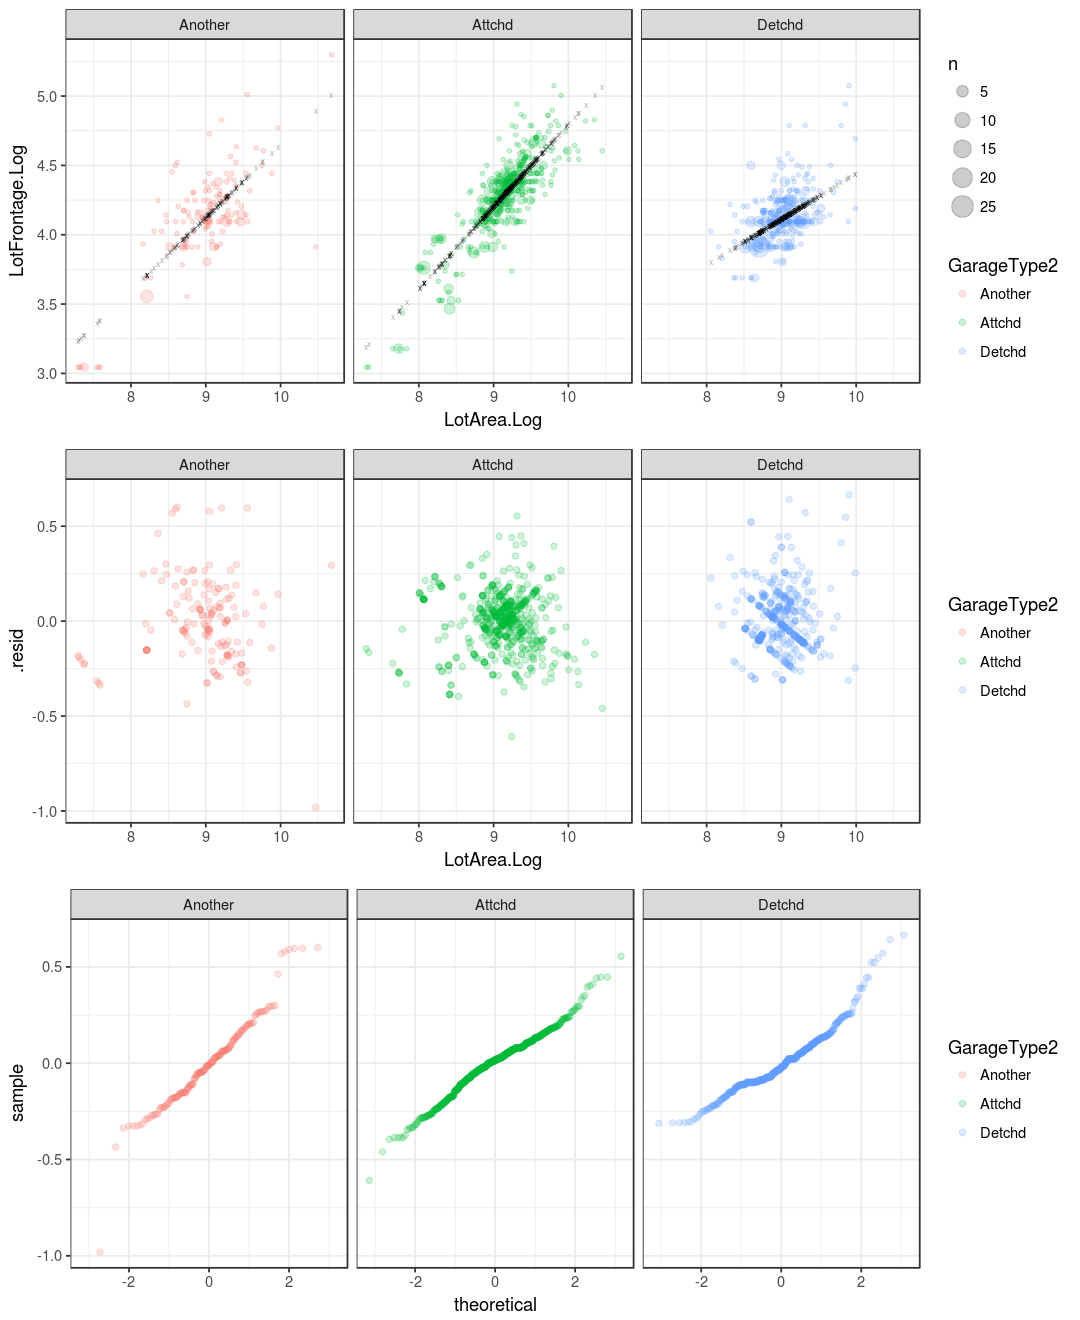

In [4]:
options(repr.plot.width = 9, repr.plot.height = 11)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg') %>%
        filter(HouseStyle.2Story == 'N') %>%
        group_by(GarageType2)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour=GarageType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~GarageType2) + 
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=GarageType2), alpha=0.2) +
    facet_wrap(~GarageType2) + 
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(aes(colour=GarageType2), distribution=qnorm, alpha=0.2) +
    facet_wrap(~GarageType2) + 
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [51]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg') %>%
        filter(HouseStyle.2Story == 'N') %>%
            filter(GarageType2 == 'Detchd')

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(10) %>% select(-AIC, -BIC)

Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
Foundation,CBlock,0.3890900,0.3863382,0.1451429,141.39232,1.491865e-25,2,115.49039,4.676756,222,224
OverallCond,7,0.3674327,0.3620720,0.1338893,68.54142,2.196654e-13,2,72.02480,2.115310,118,120
HeatingQC,TA,0.3478171,0.3444379,0.1469692,102.92925,1.176227e-19,2,98.23089,4.168791,193,195
KitchenQual,TA,0.3376075,0.3356593,0.1448834,173.29084,2.876320e-32,2,176.41045,7.137008,340,342
HouseStyle,1Story,0.3239845,0.3210324,0.1468822,109.74961,3.108038e-21,2,116.31628,4.940533,229,231
Alley,NA,0.3185262,0.3167607,0.1485165,180.41942,5.130019e-34,2,190.39352,8.514056,386,388
OverallQual,5,0.3054897,0.3022892,0.1497470,95.45036,6.433578e-19,2,106.09603,4.866043,217,219
GarageQual,TA,0.3027454,0.3008910,0.1497824,163.25785,2.682189e-31,2,182.30404,8.435471,376,378
LotConfig,Inside,0.2971729,0.2951649,0.1364973,147.98879,1.226604e-28,2,202.52712,6.521027,350,352
LotConfig2,Inside,0.2971729,0.2951649,0.1364973,147.98879,1.226604e-28,2,202.52712,6.521027,350,352


In [72]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg') %>%
        filter(HouseStyle.2Story == 'N') %>%
            filter(GarageType2 %in% c('Attchd', 'Another'))

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(10) %>% select(-AIC, -BIC)

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
BsmtFinType1,GLQ,0.8562337,0.8555220,0.1479925,1203.0580,5.075074e-87,2,101.30261,4.424158,202,204
OverallQual,7,0.8250414,0.8235460,0.1421034,551.7295,4.165144e-46,2,64.34767,2.362624,117,119
BsmtQual,Gd,0.8178146,0.8170156,0.1568570,1023.4725,2.912677e-86,2,100.70534,5.609736,228,230
Exterior1st,VinylSd,0.8123716,0.8114192,0.1409854,852.9476,1.654589e-73,2,108.49693,3.915748,197,199
Exterior2nd,VinylSd,0.8109046,0.8099447,0.1422712,844.8020,3.566534e-73,2,106.69036,3.987493,197,199
BsmtExposure,Av,0.8071352,0.8054726,0.1580764,485.4577,2.878024e-43,2,51.24572,2.898624,116,118
ExterQual,Gd,0.7986472,0.7974628,0.1389008,674.2894,4.684448e-61,2,96.47566,3.279882,170,172
GarageFinish,Fin,0.7982824,0.7970372,0.1537832,641.1029,3.380767e-58,2,75.34290,3.831183,162,164
Foundation,PConc,0.7954392,0.7946110,0.1466938,960.4650,4.374900e-87,2,125.62097,5.315207,247,249
FireplaceQu,Gd,0.7907726,0.7894890,0.1428791,616.0566,2.991413e-57,2,87.93104,3.327554,163,165


### Neighborhood != 'Somerst' & LotShape2 != 'Reg'

In [62]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg')

df %>% count()

df %>% 
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.)))

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(10) %>% select(-AIC, -BIC)

n
657


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.1690891,0.1678205,0.3113391,133.2915,3.392272e-28,2,-164.6058,335.2116,348.6746,63.49048,655


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
LotConfig,Corner,0.4233094,0.4185434,0.2039118,88.81790,3.790331e-16,2,22.057113,5.031183,121,123
LotConfig2,Corner,0.4233094,0.4185434,0.2039118,88.81790,3.790331e-16,2,22.057113,5.031183,121,123
OverallQual,8,0.3152340,0.3099666,0.3230782,59.84587,2.501385e-12,2,-37.150593,13.569337,130,132
LotConfig,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.020552,25.827281,431,433
LotConfig2,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.020552,25.827281,431,433
BsmtQual,Ex,0.2986085,0.2927144,0.2938637,50.66272,8.959677e-11,2,-22.501865,10.276350,119,121
BsmtExposure,Gd,0.2877750,0.2820313,0.3654289,50.10229,9.526637e-11,2,-50.936118,16.558750,124,126
BsmtFinType1,GLQ,0.2538791,0.2511461,0.3296128,92.89245,4.121727e-19,2,-83.999334,29.659969,273,275
FireplaceQu,Gd,0.2519448,0.2487342,0.3215794,78.47433,2.113928e-16,2,-65.836218,24.095297,233,235
ExterQual,Gd,0.2314053,0.2291042,0.3153304,100.55935,7.325252e-21,2,-87.971220,33.210707,334,336


n
123


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.4233094,0.4185434,0.2039118,88.8179,3.790331e-16,2,22.05711,-38.11423,-29.67767,5.031183,121


term,estimate,std.error,statistic,p.value
(Intercept),-0.4245613,0.52604986,-0.8070743,4.212073e-01
LotArea.Log,0.5300931,0.05624733,9.4243247,3.790331e-16


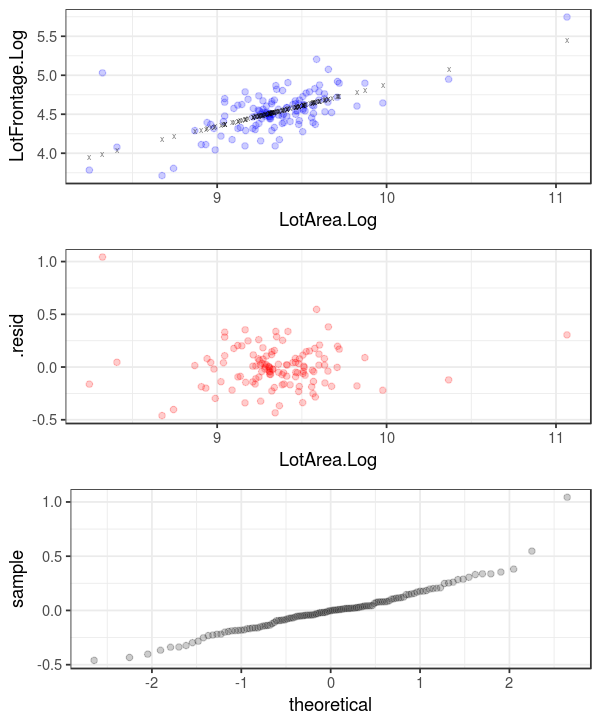

In [59]:
options(repr.plot.width = 5, repr.plot.height = 6)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg') %>%
        filter(LotConfig2 == 'Corner')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log), alpha=0.2, color="blue") +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.5, color="black", shape='x') +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid), alpha=0.2, color="red") +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [64]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg') %>%
        filter(LotConfig2 != 'Corner')

df %>% count()

df %>% 
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.)))

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(10) %>% select(-AIC, -BIC)

n
534


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.148241,0.1466399,0.303294,92.5898,2.588189e-20,2,-119.6212,245.2425,258.0837,48.93723,532


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
LotConfig,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.020552,25.82728,431,433
LotConfig2,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.020552,25.82728,431,433
OverallQual,8,0.2696152,0.2627892,0.3358424,39.49812,7.255623e-09,2,-34.723650,12.06854,107,109
BsmtExposure,Gd,0.2669771,0.2596468,0.3577248,36.42138,2.707014e-08,2,-38.866693,12.79671,100,102
HouseStyle,1Story,0.2261703,0.2233767,0.3266278,80.95989,3.761024e-17,2,-82.697704,29.55195,277,279
FireplaceQu,Gd,0.2037348,0.1995876,0.3132253,49.12569,3.966277e-11,2,-49.067379,18.83714,192,194
BsmtFinType1,GLQ,0.2025215,0.1989771,0.3181984,57.13926,1.019257e-12,2,-61.161444,22.78131,225,227
HouseStyle.2Story,N,0.2016155,0.1993081,0.3189490,87.37517,1.142105e-18,2,-95.119704,35.19804,346,348
dataSource,test,0.1947154,0.1916301,0.2992651,63.10903,5.865644e-14,2,-54.887132,23.37506,261,263
LotShape,IR1,0.1898613,0.1881805,0.2740202,112.95983,7.586455e-24,2,-59.200252,36.19196,482,484


n
433


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.3043203,0.3027062,0.244794,188.538,7.581044e-36,2,-4.020552,14.0411,26.25332,25.82728,431


term,estimate,std.error,statistic,p.value
(Intercept),0.7430773,0.2562748,2.899533,3.928211e-03
LotArea.Log,0.3808421,0.0277361,13.730914,7.581044e-36


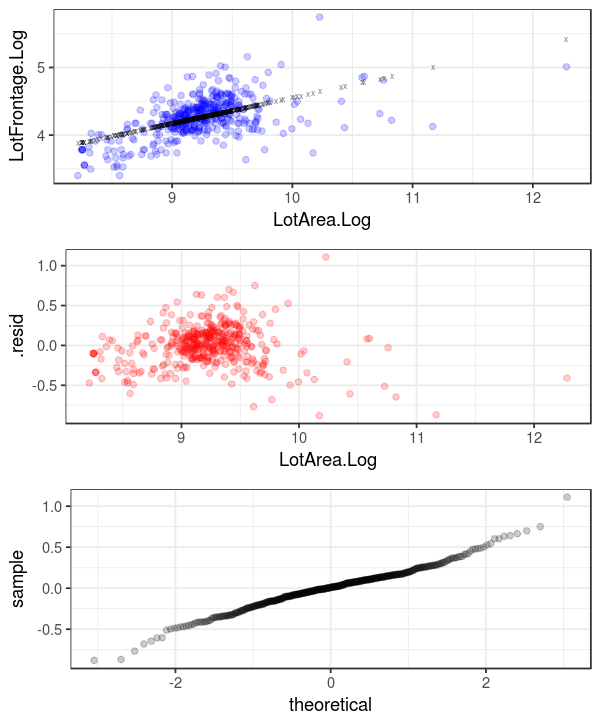

In [65]:
options(repr.plot.width = 5, repr.plot.height = 6)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg') %>%
        filter(LotConfig2 != 'Corner') %>%
            filter(LotConfig2 == 'Inside')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log), alpha=0.2, color="blue") +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.5, color="black", shape='x') +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid), alpha=0.2, color="red") +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [67]:
df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg') %>%
        filter(LotConfig2 != 'Corner') %>%
            filter(LotConfig2 == 'Inside')

df %>% count()

df %>% 
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.)))

x = kaggle.house.lmSplitByCategAttrs(
        df=df, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=100)

x %>% head(10) %>% select(-AIC, -BIC)

n
433


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.3043203,0.3027062,0.244794,188.538,7.581044e-36,2,-4.020552,14.0411,26.25332,25.82728,431


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
dataSource,test,0.4269488,0.4242069,0.2173414,155.71435,4.514944e-27,2,23.655088,9.872590,209,211
HouseStyle,1Story,0.4115434,0.4089737,0.2576842,160.15357,3.499434e-28,2,-13.529761,15.205868,229,231
BsmtFinType1,GLQ,0.3751585,0.3716283,0.2607895,106.27182,8.164256e-20,2,-12.400885,12.037973,177,179
GarageFinish,Fin,0.3634253,0.3593707,0.2375551,89.63250,4.174493e-17,2,3.934669,8.859891,157,159
HouseStyle.2Story,N,0.3593557,0.3571079,0.2572711,159.86468,2.170852e-29,2,-16.593542,18.863703,285,287
ExterQual,Gd,0.3548774,0.3519181,0.2464171,119.92025,1.602008e-22,2,-3.001357,13.237260,218,220
FireplaceQu,Gd,0.3521679,0.3480934,0.2644429,86.43395,1.080493e-16,2,-13.291928,11.118878,159,161
LotShape,IR1,0.3411895,0.3395668,0.2234398,210.26219,1.089592e-38,2,33.509835,20.269681,406,408
GarageFinish,RFn,0.3410055,0.3365827,0.2568192,77.10205,3.544349e-15,2,-7.986200,9.827457,149,151
Foundation,PConc,0.3381916,0.3357585,0.2300388,138.99511,3.437257e-26,2,14.859533,14.393652,272,274


HouseStyle.1Story,n
N,202
Y,231


HouseStyle.1Story,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
N,0.09212392,0.08758454,0.2207555,20.29438,1.127879e-05,2,19.54075,-33.08149,-23.15669,9.746594,200
Y,0.41154337,0.40897369,0.2576842,160.15357,3.499434e-28,2,-13.52976,33.05952,43.38678,15.205868,229


HouseStyle.1Story,term,estimate,std.error,statistic,p.value
N,(Intercept),2.2690014,0.45029633,5.0389070,1.044451e-06
N,LotArea.Log,0.2185974,0.04852404,4.5049286,1.127879e-05
Y,(Intercept),0.2357744,0.31567608,0.7468873,4.558978e-01
Y,LotArea.Log,0.4340180,0.03429568,12.6551797,3.499434e-28


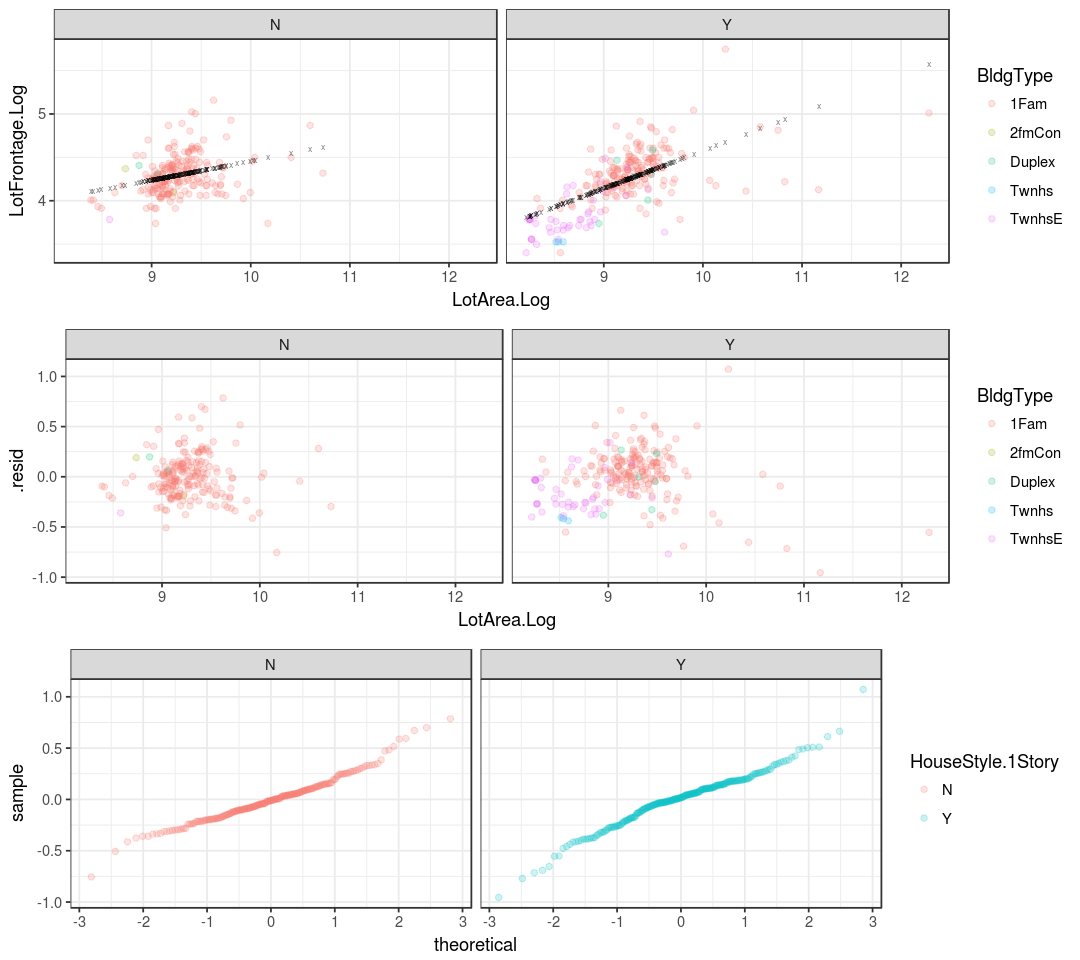

In [84]:
options(repr.plot.width = 9, repr.plot.height = 8)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg') %>%
        filter(LotConfig2 != 'Corner') %>%
            filter(LotConfig2 == 'Inside') %>%
    group_by(HouseStyle.1Story)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, color=BldgType), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.5, color="black", shape='x') +
    facet_wrap(~HouseStyle.1Story) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, color=BldgType), alpha=0.2) +
    facet_wrap(~HouseStyle.1Story) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(aes(colour=HouseStyle.1Story), distribution=qnorm, alpha=0.2) +
    facet_wrap(~HouseStyle.1Story) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

n
101


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.08690393,0.07768073,0.3723469,9.422326,0.002766346,2,-42.5219,91.04381,98.88917,13.72558,99


term,estimate,std.error,statistic,p.value
(Intercept),1.5822263,0.7898063,2.003309,0.047877393
LotArea.Log,0.2555048,0.0832377,3.069581,0.002766346


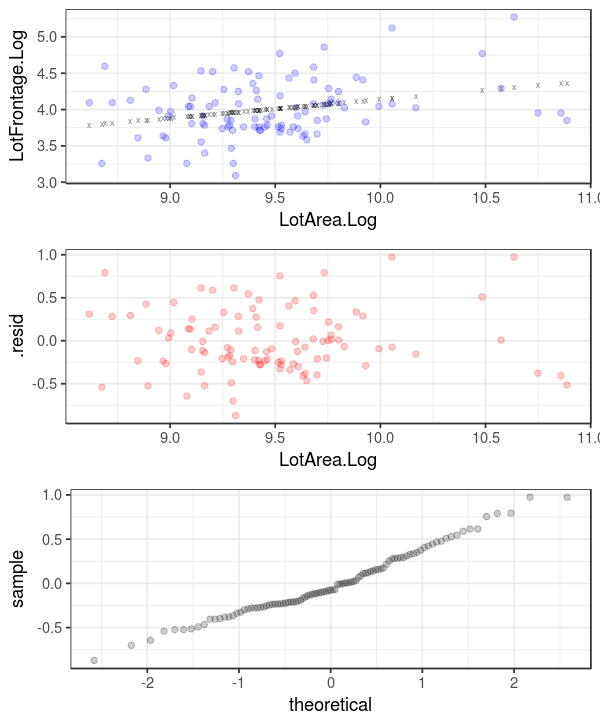

In [66]:
options(repr.plot.width = 5, repr.plot.height = 6)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg') %>%
        filter(LotConfig2 != 'Corner') %>%
            filter(LotConfig2 != 'Inside')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log), alpha=0.2, color="blue") +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.5, color="black", shape='x') +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid), alpha=0.2, color="red") +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)